In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

## Figure1

In [2]:
%store -r rs_ensemble
%store -r rs_ol
%store -r rs_wh04_filt
%store -r rs_mlr
%store -r rs_svr
%store -r rs_jra
%store -r df_amp_all_3yr

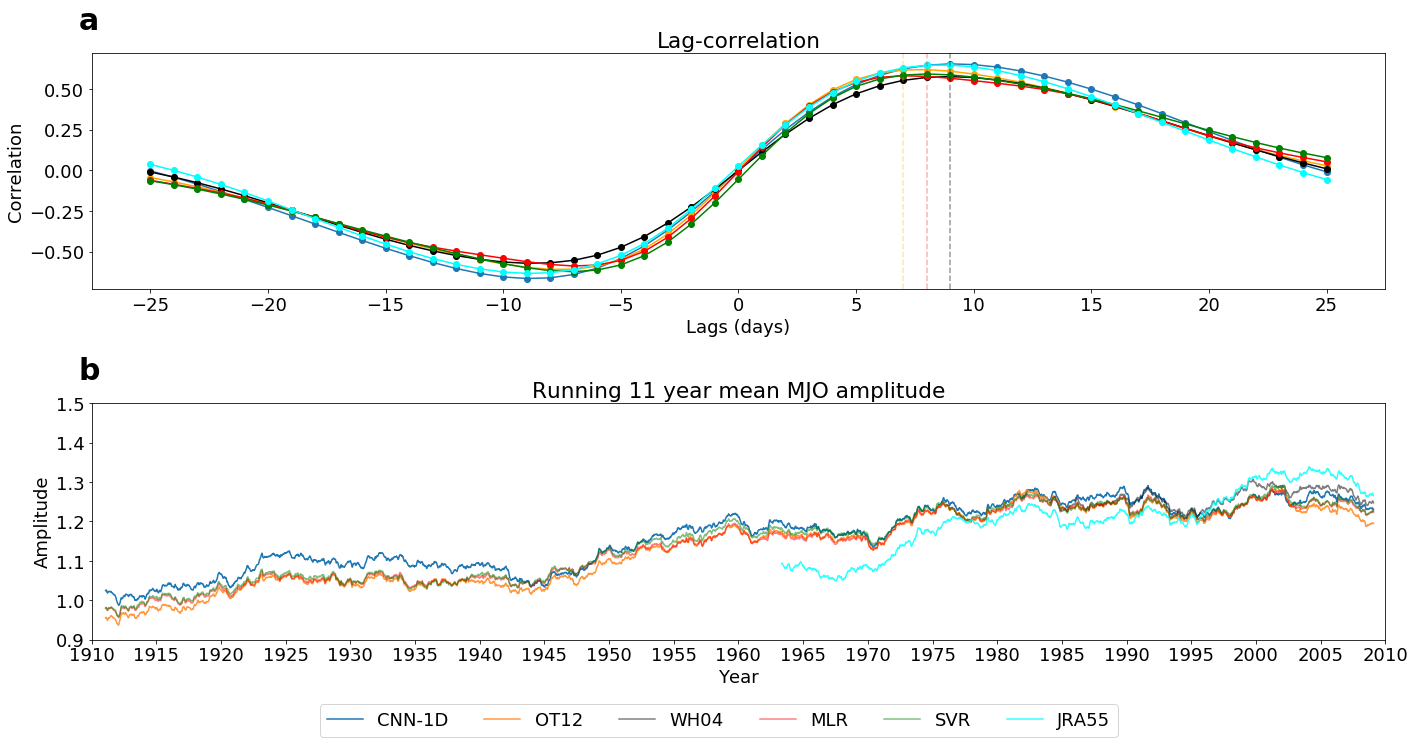

In [4]:
#### plot lag correlation
fig,ax = plt.subplots(2,1,figsize=(20,10))
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 18
plt.rcParams['image.cmap'] = 'seismic'

#### RMM1 and RMM2 plot
ax[0].plot(np.arange(-25,26),rs_ensemble,label = 'CNN-1D',marker='o',color='C0')
ax[0].plot(np.arange(-25,26),rs_ol,label = 'OT12',marker='o',color='orange')
ax[0].plot(np.arange(-25,26),rs_wh04_filt,label ='WH04',marker='o',color='k')
ax[0].plot(np.arange(-25,26),rs_mlr,label ='MLR',marker='o',color='red')
ax[0].plot(np.arange(-25,26),rs_svr,label ='SVR',marker='o',color='green')
ax[0].plot(np.arange(-25,26),rs_jra,label ='jra',marker='o',color='cyan')


ax[0].set_xticks([-25, -20, -15,-10,-5, 0,5, 10,15, 20,25])
ax[0].axvline(7,color='orange',alpha=0.3,linestyle='--')
ax[0].axvline(8,color='r',alpha=0.3,linestyle='--')
ax[0].axvline(9,color='k',alpha=0.4,linestyle='--')
ax[0].set_title('Lag-correlation')

ax[0].set_xlabel('Lags (days)')
ax[0].set_ylabel('Correlation')
### Plot amplitude running mean 
ax[0].text(-.01, 1.1, 'a', transform=ax[0].transAxes, size=30, weight='bold')



ax[1].plot(df_amp_all_3yr.iloc[:,0],'-',label='CNN-1D')
ax[1].plot(df_amp_all_3yr.iloc[:,1],'-',label='OT12',alpha=0.8)
ax[1].plot(df_amp_all_3yr.iloc[:,2],'k',label='WH04',alpha=0.5)

ax[1].plot(df_amp_all_3yr.iloc[:,3],'-',label='MLR',color= 'red',alpha=0.5)
ax[1].plot(df_amp_all_3yr.iloc[:,4],'-',label='SVR',color='green',alpha=0.5)
ax[1].plot(df_amp_all_3yr.iloc[:,6],'-',label='JRA55',color='cyan',alpha=0.8)


ax[1].set_ylim([0.9,1.5])
ax[1].set_xlim([datetime.datetime(1910,6,1),datetime.datetime(2010,6,1)])


plt.title('Running 11 year mean MJO amplitude')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=60))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Amplitude')
ax[1].text(-.01, 1.1, 'b', transform=ax[1].transAxes, size=30, weight='bold')

fig.tight_layout()


plt.legend(bbox_to_anchor=(0.8,-0.45),loc="lower right",ncol=6)
# fig.savefig('/home/cccr/supriyo/panini/jgrjd_figure/modified/jgrjd_figure1.png',dpi=300,bbox_inches='tight')


## Figure3

In [75]:
%store -r df_567_all_3yr
%store -r pdo_winter_3yr
%store -r n11
%store -r n22
%store -r x1_1

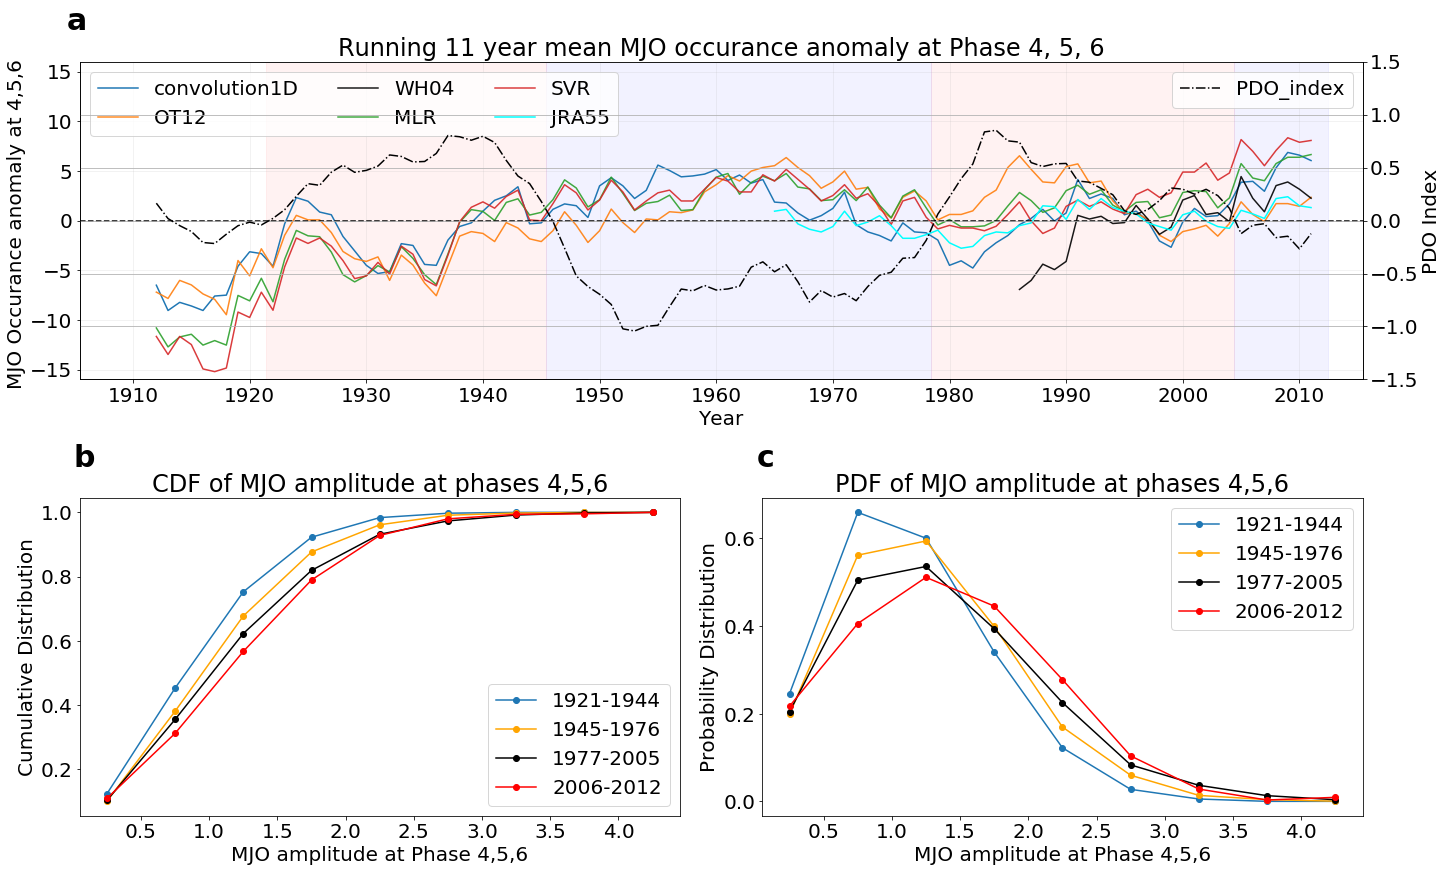

In [76]:
fig3 = plt.figure(figsize=(20,12),constrained_layout=True)
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'seismic'

gs = fig3.add_gridspec(2, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.plot(df_567_all_3yr.iloc[:,0]-df_567_all_3yr.iloc[:,0].mean(),label='convolution1D')
f3_ax1.plot(df_567_all_3yr.iloc[:,1]-df_567_all_3yr.iloc[:,1].mean(),'-',label='OT12',alpha=0.9)
f3_ax1.plot(df_567_all_3yr.iloc[:,2]-df_567_all_3yr.iloc[:,2].mean(),'k',label='WH04',alpha=0.9)
f3_ax1.plot(df_567_all_3yr.iloc[:,3]-df_567_all_3yr.iloc[:,3].mean(),'-',label='MLR',alpha=0.9)
f3_ax1.plot(df_567_all_3yr.iloc[:,4]-df_567_all_3yr.iloc[:,4].mean(),'-',label='SVR',alpha=0.9)
f3_ax1.plot(df_567_all_3yr.iloc[:,6]-df_567_all_3yr.iloc[:,6].mean(),'-',label='JRA55',color='cyan')

f3_ax1.xaxis.set_major_locator(mdates.YearLocator(base=10))
f3_ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f3_ax1.grid(True)

f3_ax1.set_ylim([-16,16])
f3_ax1.grid(linestyle='-', linewidth=.5,alpha=0.3)
f3_ax1.axhline(0,color='k',linestyle='--')
f3_ax1.set_xlim([datetime.datetime(1905,6,1),datetime.datetime(2015,6,1)])


fig.text(0.5, -0.04, 'Year', ha='center')
fig.text(0.07, 0.5, 'MJO duration at 4,5,6', va='center', rotation='vertical')
f3_ax1.axvspan(datetime.datetime(1921,6,1),datetime.datetime(1945,6,1),color = 'r',alpha = 0.05)
f3_ax1.axvspan(datetime.datetime(1945,6,1),datetime.datetime(1978,6,1),color = 'b',alpha = 0.05)
f3_ax1.axvspan(datetime.datetime(1978,6,1),datetime.datetime(2004,6,1),color = 'r',alpha = 0.05)# ax.axvspan(1998,2012,alpha = 0.1)
f3_ax1.axvspan(datetime.datetime(2004,6,1),datetime.datetime(2012,6,1),color = 'b',alpha = 0.05)
f3_ax1.legend(ncol=3)

##
ax2 = f3_ax1.twinx()
ax2.plot(pdo_winter_3yr-pdo_winter_3yr.mean(),'-.',label='PDO_index',color='k')
ax2.set_ylim([-1.5,1.5])
ax2.set_ylabel('PDO Index')
ax2.xaxis.set_major_locator(mdates.YearLocator(base=10))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.grid(True)
ax2.legend()
f3_ax1.set_xlabel('Year')
f3_ax1.set_ylabel('MJO Occurance anomaly at 4,5,6 ')
f3_ax1.text(-.01, 1.1, 'a', transform=f3_ax1.transAxes, size=30, weight='bold')
f3_ax1.set_title('Running 11 year mean MJO occurance anomaly at Phase 4, 5, 6')

f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('CDF of MJO amplitude at phases 4,5,6')

bin_centers = 0.5*(x1_1[1:]+x1_1[:-1])
f3_ax2.plot(bin_centers,np.nanmean(n11,0)[0,:],'-o',label='1921-1944')
f3_ax2.plot(bin_centers,np.nanmean(n11,0)[1,:],'-o',color='orange',label='1945-1976')
f3_ax2.plot(bin_centers,np.nanmean(n11,0)[2,:],'-ko',label='1977-2005')
f3_ax2.plot(bin_centers,np.nanmean(n11,0)[3,:],'-o',color='r',label='2006-2012')
f3_ax2.set_ylabel('Cumulative Distribution')
f3_ax2.set_xlabel('MJO amplitude at Phase 4,5,6')
f3_ax2.legend()
f3_ax2.text(-.01, 1.1, 'b', transform=f3_ax2.transAxes, size=30, weight='bold')

f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('PDF of MJO amplitude at phases 4,5,6') 
bin_centers = 0.5*(x1_1[1:]+x1_1[:-1])
f3_ax3.plot(bin_centers,np.nanmean(n22,0)[0,:],'-o',label='1921-1944')
f3_ax3.plot(bin_centers,np.nanmean(n22,0)[1,:],'-o',color='orange',label='1945-1976')
f3_ax3.plot(bin_centers,np.nanmean(n22,0)[2,:],'-ko',label='1977-2005')
f3_ax3.plot(bin_centers,np.nanmean(n22,0)[3,:],'-o',color='r',label='2006-2012')
f3_ax3.set_ylabel('Probability Distribution')
f3_ax3.set_xlabel('MJO amplitude at Phase 4,5,6')
f3_ax3.text(-.01, 1.1, 'c', transform=f3_ax3.transAxes, size=30, weight='bold')

f3_ax3.legend()
plt.savefig('/home/cccr/supriyo/panini/jgrjd_figure/modified/jgrjd_figure3.png',dpi=300,bbox_inches='tight')


## Figure 4

In [77]:
%store -r AA1_conv
%store -r AA1_ol
%store -r AA1_wh04
%store -r AA1_mlr
%store -r AA1_svr
%store -r AA1_jra

%store -r phase1_conv_hist
%store -r phase1_ol_hist
%store -r phase1_wh04_filt
%store -r phase1_mlr_hist
%store -r phase1_svr_hist
%store -r phase1_jra_hist


%store -r pow1_rmm1 
%store -r pow2_rmm1
%store -r pow3_rmm1
%store -r pow4_rmm1
%store -r pow1_rmm2 
%store -r pow2_rmm2
%store -r pow3_rmm2
%store -r pow4_rmm2
%store -r T

def smooth(x,window_len=11,window='hanning'):
    ##https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.
    output:
        the smoothed signal
        
    example:
    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [78]:
import mjo_events_detection_from_rmm as md

window_len=11 ; ww = 2*(window_len//2)
yy=str(int(1906+ww/2));ll1= 109-ww;yy2=str(int(1979+ww/2));ll2=36-ww;yy3=str(int(1959+ww/2));ll3=57-ww


season = 'allyear'
no_events_conv,events_conv,life_conv,lf_123_conv,lf_567_conv = md.mjo_events(AA1_conv,phase1_conv_hist,1906,109,season)
no_events_ol,events_ol,life_ol,lf_123_ol,lf_567_ol = md.mjo_events(AA1_ol,phase1_ol_hist,1906,109,season)
no_events_wh04,events_wh04,life_wh04,lf_123_wh04,lf_567_wh04 = md.mjo_events(AA1_wh04,phase1_wh04_filt,1979,36,season)
no_events_mlr,events_mlr,life_mlr,lf_123_mlr,lf_567_mlr = md.mjo_events(AA1_mlr,phase1_mlr_hist,1906,109,season)
no_events_svr,events_svr,life_svr,lf_123_svr,lf_567_svr = md.mjo_events(AA1_svr,phase1_svr_hist,1906,109,season)
no_events_jra,events_jra,life_jra,lf_123_jra,lf_567_jra = md.mjo_events(AA1_jra,phase1_jra_hist,1959,57,season)

cc_conv = smooth(no_events_conv,window_len=window_len,window='flat')[ww:-ww]

cc_ol = smooth(no_events_ol,window_len=window_len,window='flat')[ww:-ww]

cc_wh04 = smooth(no_events_wh04,window_len=window_len,window='flat')[ww:-ww]

cc_mlr = smooth(no_events_mlr,window_len=window_len,window='flat')[ww:-ww]

cc_svr = smooth(no_events_svr,window_len=window_len,window='flat')[ww:-ww]

cc_jra = smooth(no_events_jra,window_len=window_len,window='flat')[ww:-ww]


df_conv_3yr_allyr  =   pd.DataFrame(cc_conv,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_ol_3yr_allyr    =   pd.DataFrame(cc_ol,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_wh04_3yr_allyr  =   pd.DataFrame(cc_wh04,index=pd.date_range(yy2+'-01-01',periods=ll2,freq='Y'),columns=['duration'])
df_mlr_3yr_allyr   =   pd.DataFrame(cc_mlr,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_svr_3yr_allyr   =   pd.DataFrame(cc_svr,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_jra_3yr_allyr   =   pd.DataFrame(cc_jra,index=pd.date_range(yy3+'-01-01',periods=ll3,freq='Y'),columns=['duration'])

df_events_allyr=pd.concat([df_conv_3yr_allyr,df_ol_3yr_allyr,df_wh04_3yr_allyr,df_mlr_3yr_allyr,df_svr_3yr_allyr,df_jra_3yr_allyr],axis=1)



#################################################################################


season = 'winter'
no_events_conv,events_conv,life_conv,lf_123_conv,lf_567_conv = md.mjo_events(AA1_conv,phase1_conv_hist,1906,109,season)
no_events_ol,events_ol,life_ol,lf_123_ol,lf_567_ol = md.mjo_events(AA1_ol,phase1_ol_hist,1906,109,season)
no_events_wh04,events_wh04,life_wh04,lf_123_wh04,lf_567_wh04 = md.mjo_events(AA1_wh04,phase1_wh04_filt,1979,36,season)
no_events_mlr,events_mlr,life_mlr,lf_123_mlr,lf_567_mlr = md.mjo_events(AA1_mlr,phase1_mlr_hist,1906,109,season)
no_events_svr,events_svr,life_svr,lf_123_svr,lf_567_svr = md.mjo_events(AA1_svr,phase1_svr_hist,1906,109,season)
no_events_jra,events_jra,life_jra,lf_123_jra,lf_567_jra = md.mjo_events(AA1_jra,phase1_jra_hist,1959,57,season)

cc_conv = smooth(no_events_conv,window_len=window_len,window='flat')[ww:-ww]

cc_ol = smooth(no_events_ol,window_len=window_len,window='flat')[ww:-ww]

cc_wh04 = smooth(no_events_wh04,window_len=window_len,window='flat')[ww:-ww]

cc_mlr = smooth(no_events_mlr,window_len=window_len,window='flat')[ww:-ww]

cc_svr = smooth(no_events_svr,window_len=window_len,window='flat')[ww:-ww]

cc_jra = smooth(no_events_jra,window_len=window_len,window='flat')[ww:-ww]


df_conv_3yr_wintr  =   pd.DataFrame(cc_conv,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_ol_3yr_wintr    =   pd.DataFrame(cc_ol,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_wh04_3yr_wintr  =   pd.DataFrame(cc_wh04,index=pd.date_range(yy2+'-01-01',periods=ll2,freq='Y'),columns=['duration'])
df_mlr_3yr_wintr   =   pd.DataFrame(cc_mlr,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_svr_3yr_wintr   =   pd.DataFrame(cc_svr,index=pd.date_range(yy+'-01-01',periods=ll1,freq='Y'),columns=['duration'])
df_jra_3yr_wintr   =   pd.DataFrame(cc_jra,index=pd.date_range(yy3+'-01-01',periods=ll3,freq='Y'),columns=['duration'])

df_events_wintr=pd.concat([df_conv_3yr_wintr,df_ol_3yr_wintr,df_wh04_3yr_wintr,df_mlr_3yr_wintr,df_svr_3yr_wintr,df_jra_3yr_wintr],axis=1)



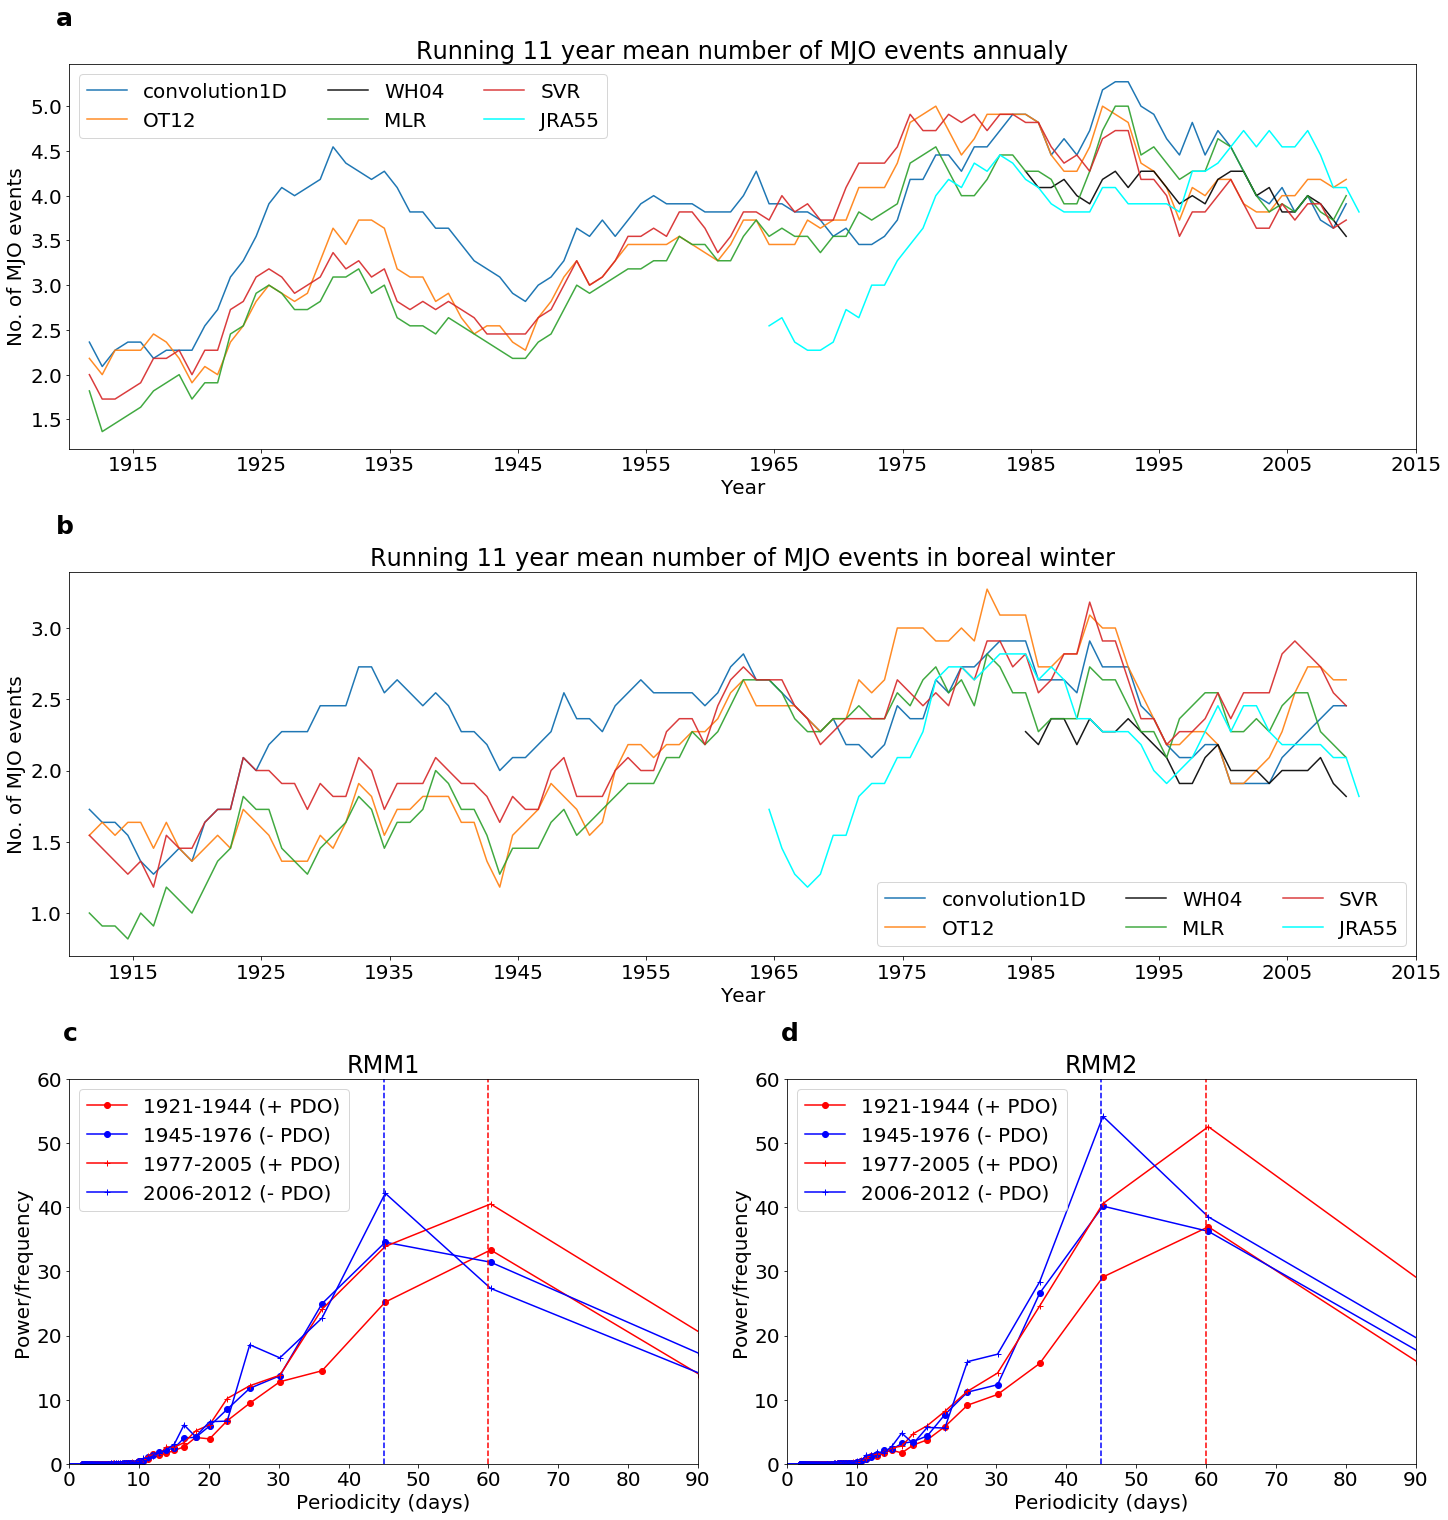

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot

fig3 = plt.figure(figsize=(20,21),constrained_layout=True)
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'seismic'

gs = fig3.add_gridspec(3, 2)
ax1 = fig3.add_subplot(gs[0, :])
ax2 = fig3.add_subplot(gs[1, :])
ax3 = fig3.add_subplot(gs[2:, :-1])
ax4 = fig3.add_subplot(gs[2, -1])

#################################
ax1.plot(df_events_allyr.iloc[:,0],label='convolution1D')
ax1.plot(df_events_allyr.iloc[:,1],'-',label='OT12',alpha=0.9)
ax1.plot(df_events_allyr.iloc[:,2],'k',label='WH04',alpha=0.9)
ax1.plot(df_events_allyr.iloc[:,3],'-',label='MLR',alpha=0.9)
ax1.plot(df_events_allyr.iloc[:,4],'-',label='SVR',alpha=0.9)
ax1.plot(df_events_allyr.iloc[:,5],'-',label='JRA55',color='cyan')
ax1.set_xlim([datetime.datetime(1910,6,1),datetime.datetime(2015,6,1)])

ax1.set_title('Running 11 year mean number of MJO events annualy')
ax1.legend(ncol=3)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=120))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_ylabel('No. of MJO events')
ax1.set_xlabel('Year')

ax1.text(-.01, 1.1, 'a', transform=ax1.transAxes, size=25, weight='bold')

############################
ax2.plot(df_events_wintr.iloc[:,0],label='convolution1D')
ax2.plot(df_events_wintr.iloc[:,1],'-',label='OT12',alpha=0.9)
ax2.plot(df_events_wintr.iloc[:,2],'k',label='WH04',alpha=0.9)
ax2.plot(df_events_wintr.iloc[:,3],'-',label='MLR',alpha=0.9)
ax2.plot(df_events_wintr.iloc[:,4],'-',label='SVR',alpha=0.9)
ax2.plot(df_events_wintr.iloc[:,5],'-',label='JRA55',color='cyan')
ax2.set_xlim([datetime.datetime(1910,6,1),datetime.datetime(2015,6,1)])

ax2.legend(ncol=3,loc="lower right")
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=120))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Running 11 year mean number of MJO events in boreal winter')
ax2.set_ylabel('No. of MJO events')
ax2.set_xlabel('Year')
ax2.text(-.01, 1.1, 'b', transform=ax2.transAxes, size=25, weight='bold')

#########################################
st1 = 1921 ; en1 = 1944 ; st2 =1945 ;en2 =1976;st3 =1977;en3 =2005;st4 =2006;en4 =2012;

ax3.plot(T,pow1_rmm1,'ro-',label=str(st1)+'-'+str(en1)+' (+ PDO)')
ax3.plot(T,pow2_rmm1,'bo-',label=str(st2)+'-'+str(en2)+' (- PDO)')
ax3.plot(T,pow3_rmm1,'r+-',label=str(st3)+'-'+str(en3)+' (+ PDO)')
ax3.plot(T,pow4_rmm1,'b+-',label=str(st4)+'-'+str(en4)+' (- PDO)')
ax4.plot(T,pow1_rmm2,'ro-',label=str(st1)+'-'+str(en1)+' (+ PDO)')
ax4.plot(T,pow2_rmm2,'bo-',label=str(st2)+'-'+str(en2)+' (- PDO)')
ax4.plot(T,pow3_rmm2,'r+-',label=str(st3)+'-'+str(en3)+' (+ PDO)')
ax4.plot(T,pow4_rmm2,'b+-',label=str(st4)+'-'+str(en4)+' (- PDO)')

ax3.set_title('RMM1')
ax4.set_title('RMM2')

ax3.set_xlim([0,90])
ax3.set_ylim([0,60])
ax4.set_xlim([0,90])
ax4.set_ylim([0,60])
ax3.axvline(45,linestyle='--',color='b')
ax3.axvline(60,linestyle='--',color='r')
ax4.axvline(45,linestyle='--',color='b')
ax4.axvline(60,linestyle='--',color='r')

ax3.set_ylabel('Power/frequency')
ax3.set_xlabel('Periodicity (days)')

ax4.set_ylabel('Power/frequency')
ax4.set_xlabel('Periodicity (days)')

ax3.text(-.01, 1.1, 'c', transform=ax3.transAxes, size=25, weight='bold')
ax4.text(-.01, 1.1, 'd', transform=ax4.transAxes, size=25, weight='bold')

ax3.legend()
ax4.legend()
plt.savefig('/home/cccr/supriyo/panini/jgrjd_figure/modified/jgrjd_figure4.png',dpi=300,bbox_inches='tight')
